In [111]:
# import libraries 

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay


from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout


In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load Data**

In [113]:
# Load Mobile Dataframe training data 
mobile_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Advance Machine Learning /Project 2 /train.csv')
mobile_df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [114]:
# dataframe shape 
mobile_df.shape

(2000, 21)

In [115]:
#. data info 
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**EDA**

In [116]:
# Identitfy duplicates 
mobile_df.duplicated().sum()

0

In [117]:
# Check for missing data
mobile_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [118]:
# get statistics  
mobile_df.describe().round()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,...,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
mean,1239.0,0.0,2.0,1.0,4.0,1.0,32.0,1.0,140.0,5.0,...,645.0,1252.0,2124.0,12.0,6.0,11.0,1.0,1.0,1.0,2.0
std,439.0,1.0,1.0,1.0,4.0,0.0,18.0,0.0,35.0,2.0,...,444.0,432.0,1085.0,4.0,4.0,5.0,0.0,1.0,1.0,1.0
min,501.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,80.0,1.0,...,0.0,500.0,256.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0
25%,852.0,0.0,1.0,0.0,1.0,0.0,16.0,0.0,109.0,3.0,...,283.0,875.0,1208.0,9.0,2.0,6.0,1.0,0.0,0.0,1.0
50%,1226.0,0.0,2.0,1.0,3.0,1.0,32.0,0.0,141.0,4.0,...,564.0,1247.0,2146.0,12.0,5.0,11.0,1.0,1.0,1.0,2.0
75%,1615.0,1.0,2.0,1.0,7.0,1.0,48.0,1.0,170.0,7.0,...,947.0,1633.0,3064.0,16.0,9.0,16.0,1.0,1.0,1.0,2.0
max,1998.0,1.0,3.0,1.0,19.0,1.0,64.0,1.0,200.0,8.0,...,1960.0,1998.0,3998.0,19.0,18.0,20.0,1.0,1.0,1.0,3.0


#Visualization

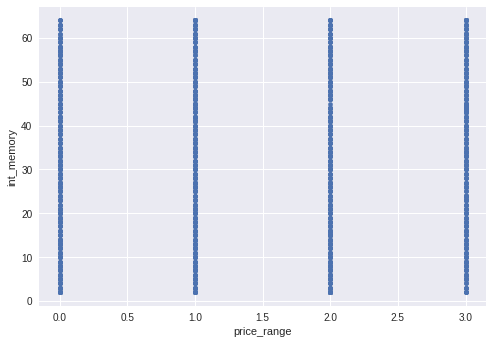

In [119]:
# create scatterplot of the mobile_df features.
mobile_df.plot(kind="scatter", x="price_range", y="int_memory")

The scatter plot above shows that the internal memory and price range features are aligned with each other. Even though price ranges increase the internal memory does not shift. 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


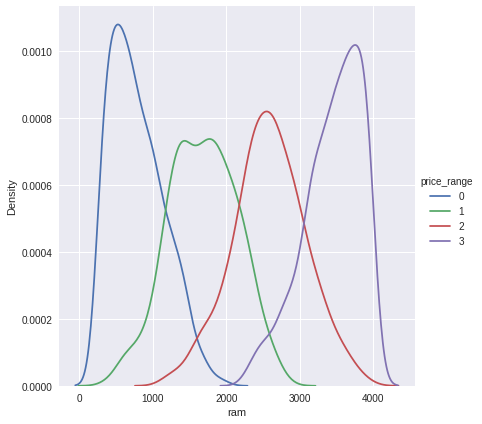

In [120]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(mobile_df, hue="price_range", size=6) \
   .map(sns.kdeplot, "ram") \
   .add_legend()

When the ram speed is low the price range is low. And from the collection of data, the low price ranges and low ram speed has the highest density.  The second-highest density is when the price range is high and the ram is high. 

In [121]:
# creating a function in order to display median value above the bar
def mean_label(x_pos, y_val, adj):
  plt.text(x_pos, (y_val + adj), s=y_val, ha="center")

1.5


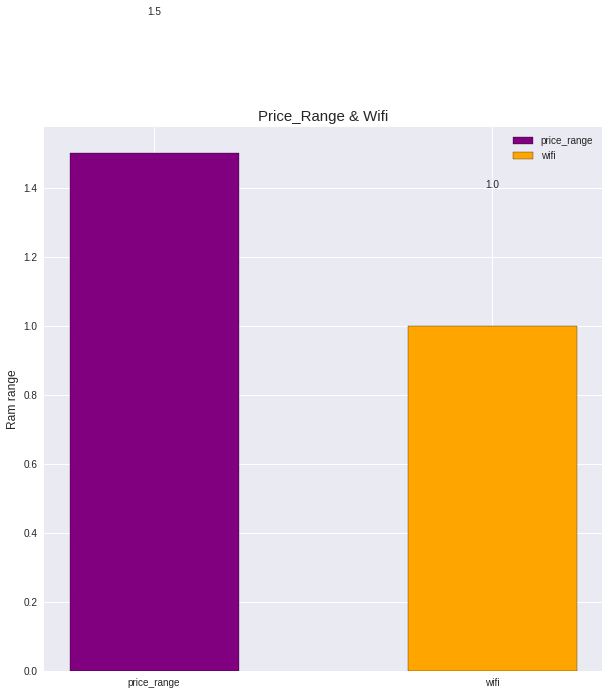

In [122]:
# Creating a multivariate bar chart for the features that are in the same units 
# and comparing their medians. 

# Creating varibales to store median values 
x_p = 'price_range'
x_r = 'wifi'
price_range = round(mobile_df['price_range'].median(), 2)
wifi = round(mobile_df['wifi'].median(), 2)
print(price_range)
# setting width of bar and plot size and styling
plt.style.use('seaborn')
bar_width = 0.5
fig = plt.subplots(figsize=(10,10))

# creating the barplots and adding legends, axis labels, title, and bar values
plt.bar(x_p, price_range, color='purple', width=bar_width, 
        edgecolor='black', label=x_p);

plt.bar(x_r, wifi, color='orange', width=bar_width, 
        edgecolor='black', label=x_r);
plt.legend(loc='upper right');

mean_label(x_p, price_range, 0.4);
mean_label(x_r, wifi, 0.4);

plt.ylabel('Ram range', fontdict={'fontsize':12})
plt.title('Price_Range & Wifi', 
          fontdict={'fontsize':15});

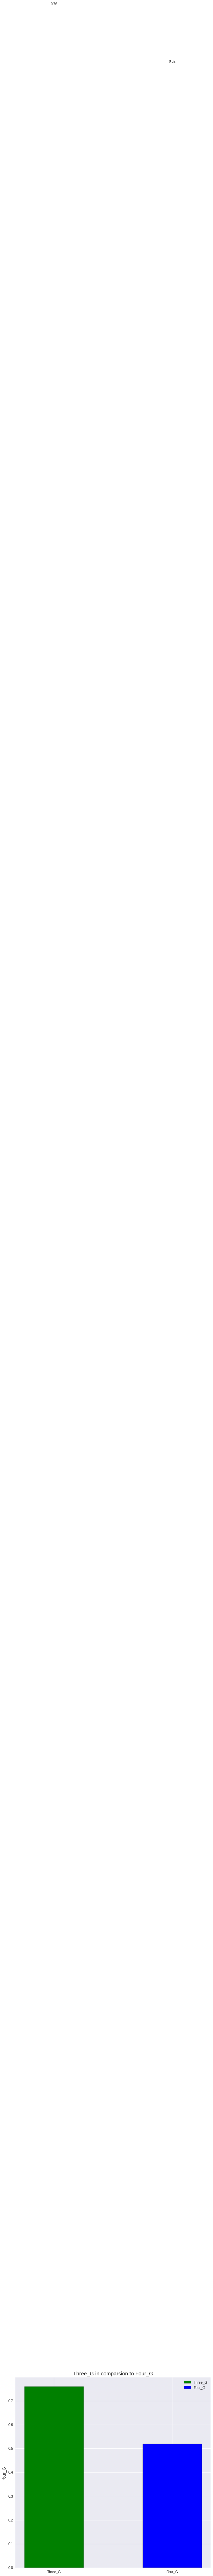

In [123]:
# Creating a multivariate bar chart for the features that are important 
# and comparing their means. 

# make a copy of the df since I'll be calculating mean for 
# Three_G vs. Four_G
df2 = mobile_df.copy()

# Creating varibales to store median values 
three_g = round(df2['three_g'].mean(), 2)
four_g = round(df2['four_g'].mean(), 2)
x_3 = 'Three_G'
x_4 = 'Four_G'

# setting width of bar and plot size and styling
plt.style.use('seaborn')
bar_width = 0.5
fig = plt.subplots(figsize=(10,10))

# creating the barplots and adding legends, axis labels, title, and bar values
plt.bar(x_3, three_g, color='g', width=bar_width, 
        edgecolor='black', label='Three_G');
plt.bar(x_4, four_g, color='b', width=bar_width, 
        edgecolor='black', label='Four_G');

plt.legend();
mean_label(x_3, three_g, 10);
mean_label(x_4, four_g, 10);
plt.ylabel('four_G', fontdict={'fontsize':12})
plt.title('Three_G in comparsion to Four_G', fontdict={'fontsize':15});

Three G seems to have a more pronounced representation in the data set versus four_G. This means phones with either three or four would not affect the price range of any given phone. 

In [124]:
# Check statistic data 

mobile_df.head().describe().round(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00
mean,972.40,0.80,1.38,0.40,3.20,0.60,31.00,0.72,148.20,3.60,...,922.40,1491.60,2392.6,12.20,4.40,12.20,0.80,0.60,0.20,1.60
std,508.63,0.45,0.94,0.55,5.54,0.55,21.04,0.13,22.86,1.82,...,524.02,500.68,554.7,4.09,2.88,4.82,0.45,0.55,0.45,0.55
min,563.00,0.00,0.50,0.00,0.00,0.00,7.00,0.60,131.00,2.00,...,20.00,756.00,1411.0,8.00,2.00,7.00,0.00,0.00,0.00,1.00
25%,615.00,1.00,0.50,0.00,0.00,0.00,10.00,0.60,136.00,2.00,...,905.00,1212.00,2549.0,9.00,2.00,9.00,1.00,0.00,0.00,1.00
50%,842.00,1.00,1.20,0.00,1.00,1.00,41.00,0.70,141.00,3.00,...,1208.00,1716.00,2603.0,11.00,3.00,11.00,1.00,1.00,0.00,2.00
75%,1021.00,1.00,2.20,1.00,2.00,1.00,44.00,0.80,145.00,5.00,...,1216.00,1786.00,2631.0,16.00,7.00,15.00,1.00,1.00,0.00,2.00
max,1821.00,1.00,2.50,1.00,13.00,1.00,53.00,0.90,188.00,6.00,...,1263.00,1988.00,2769.0,17.00,8.00,19.00,1.00,1.00,1.00,2.00


<Figure size 864x720 with 0 Axes>

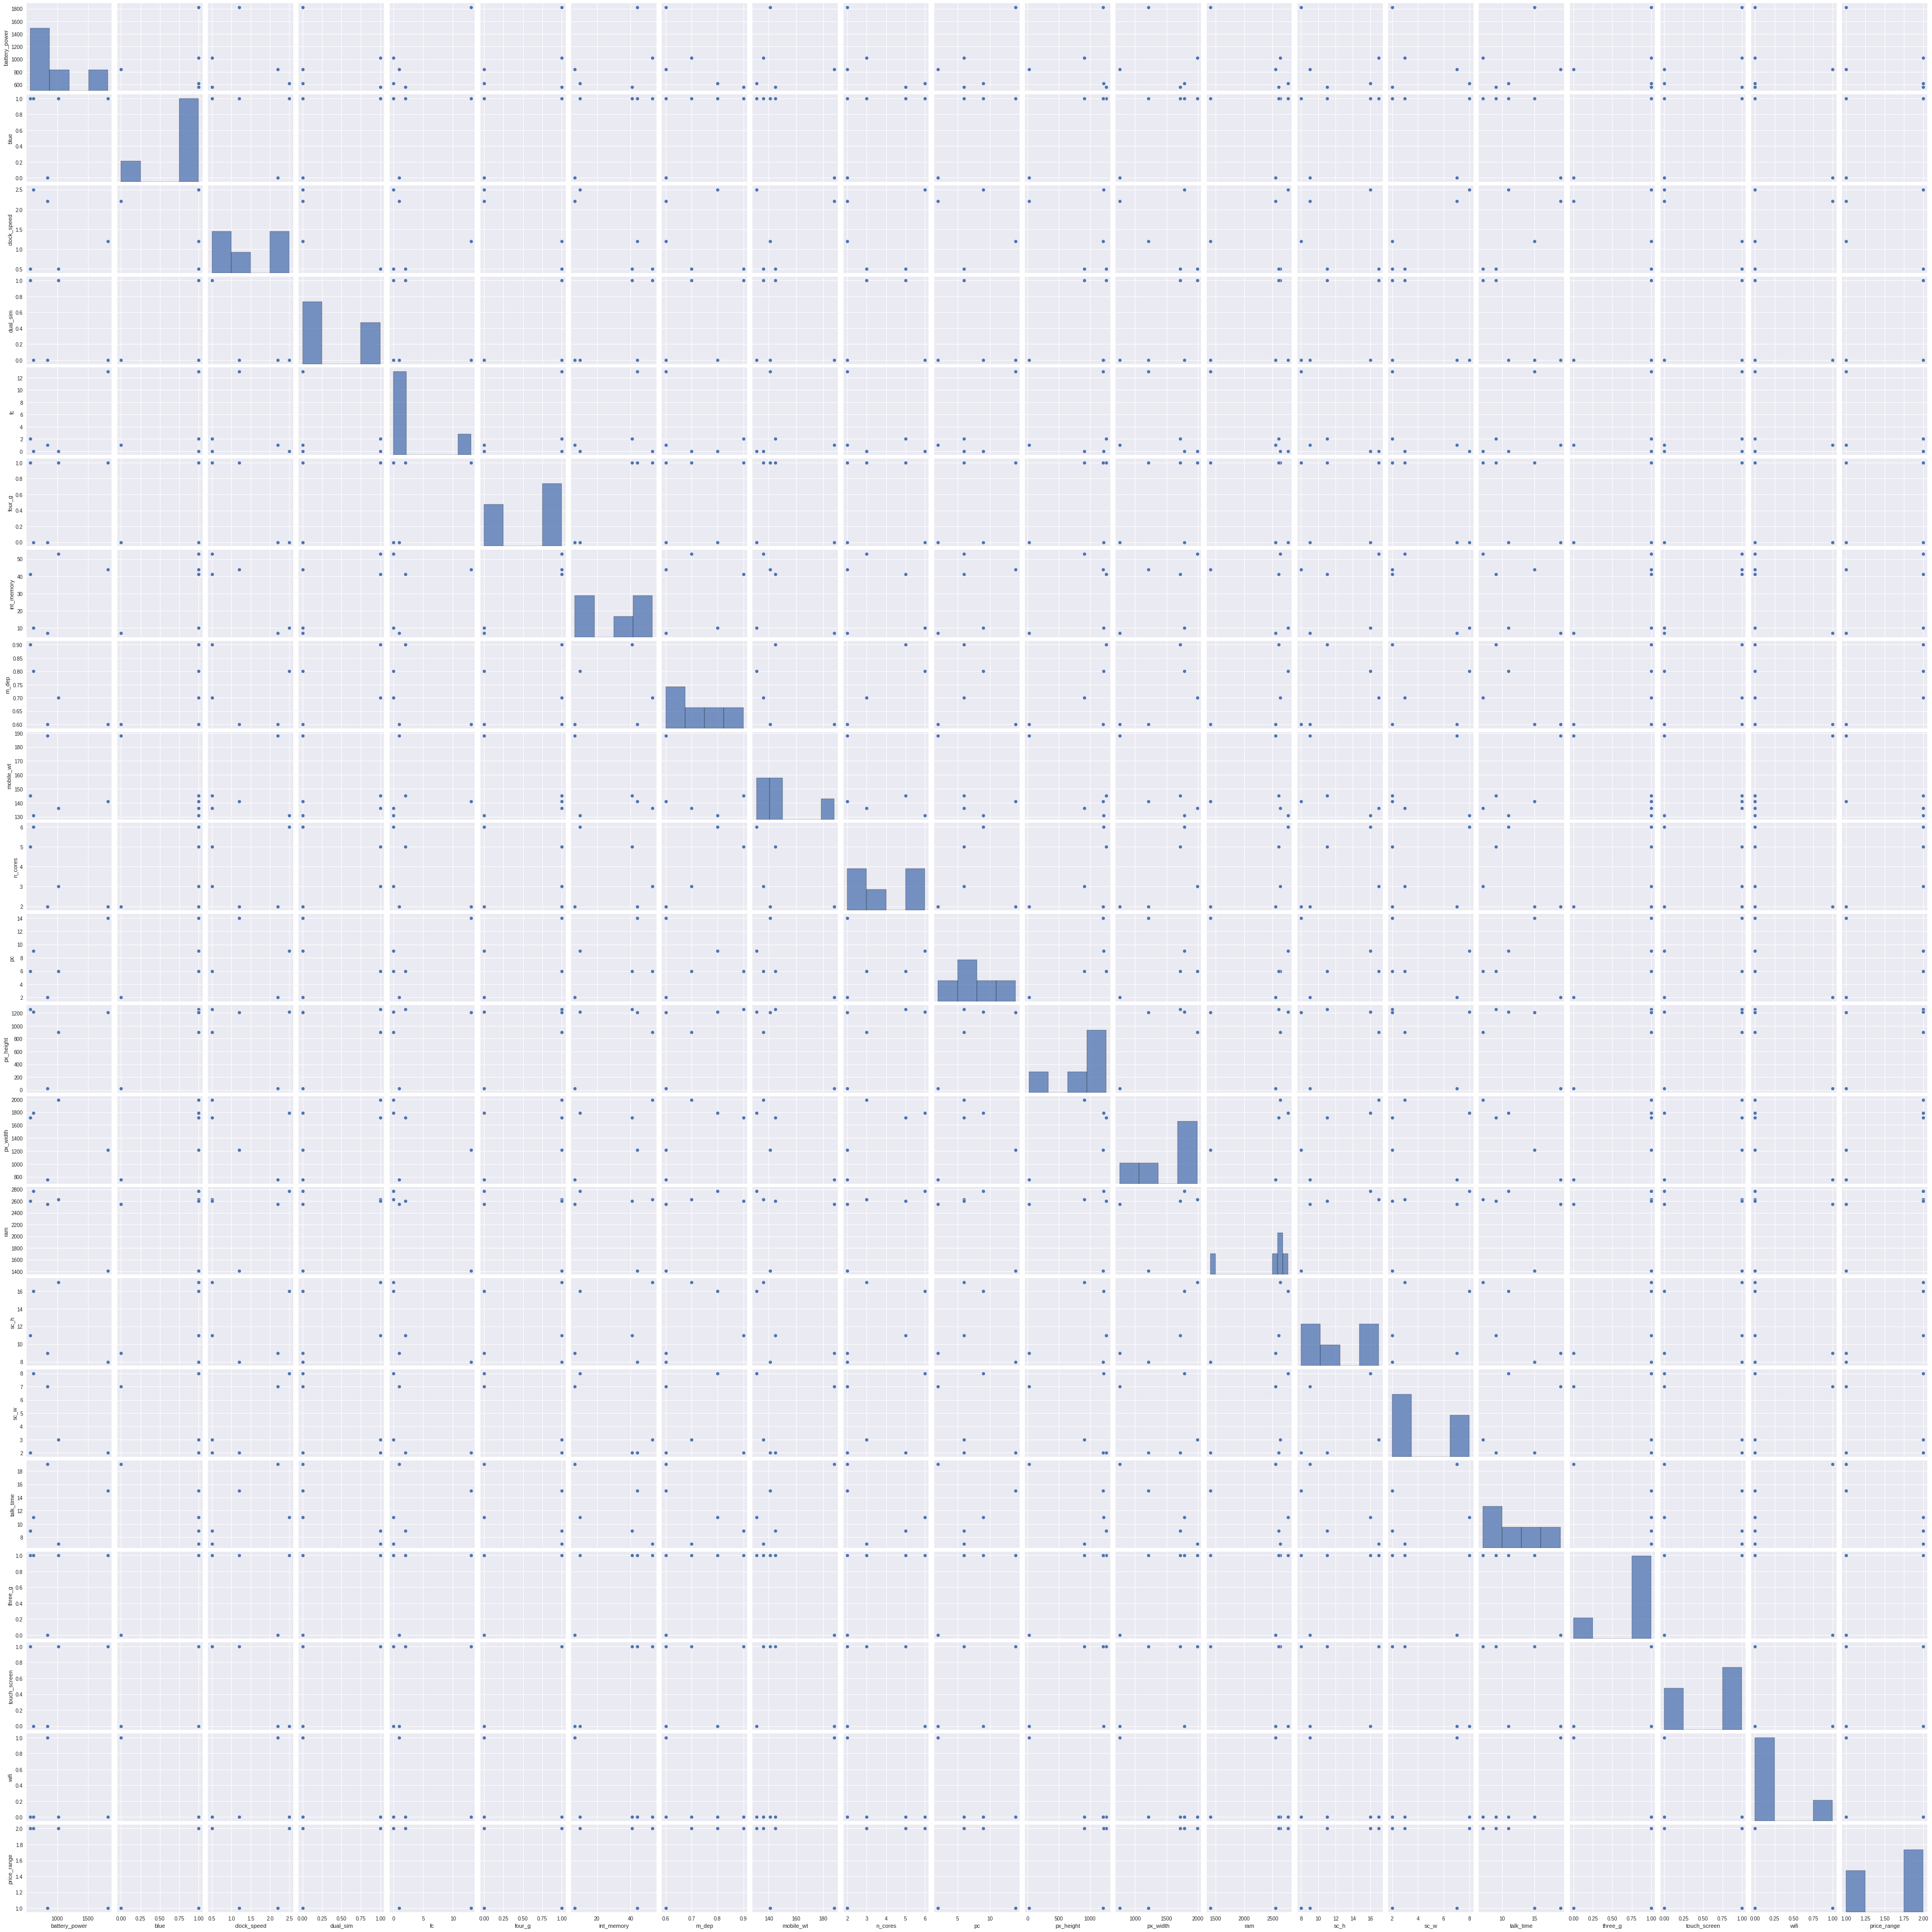

In [125]:
fig = plt.figure(figsize = (12, 10))
             
sns.pairplot(mobile_df.head(5));


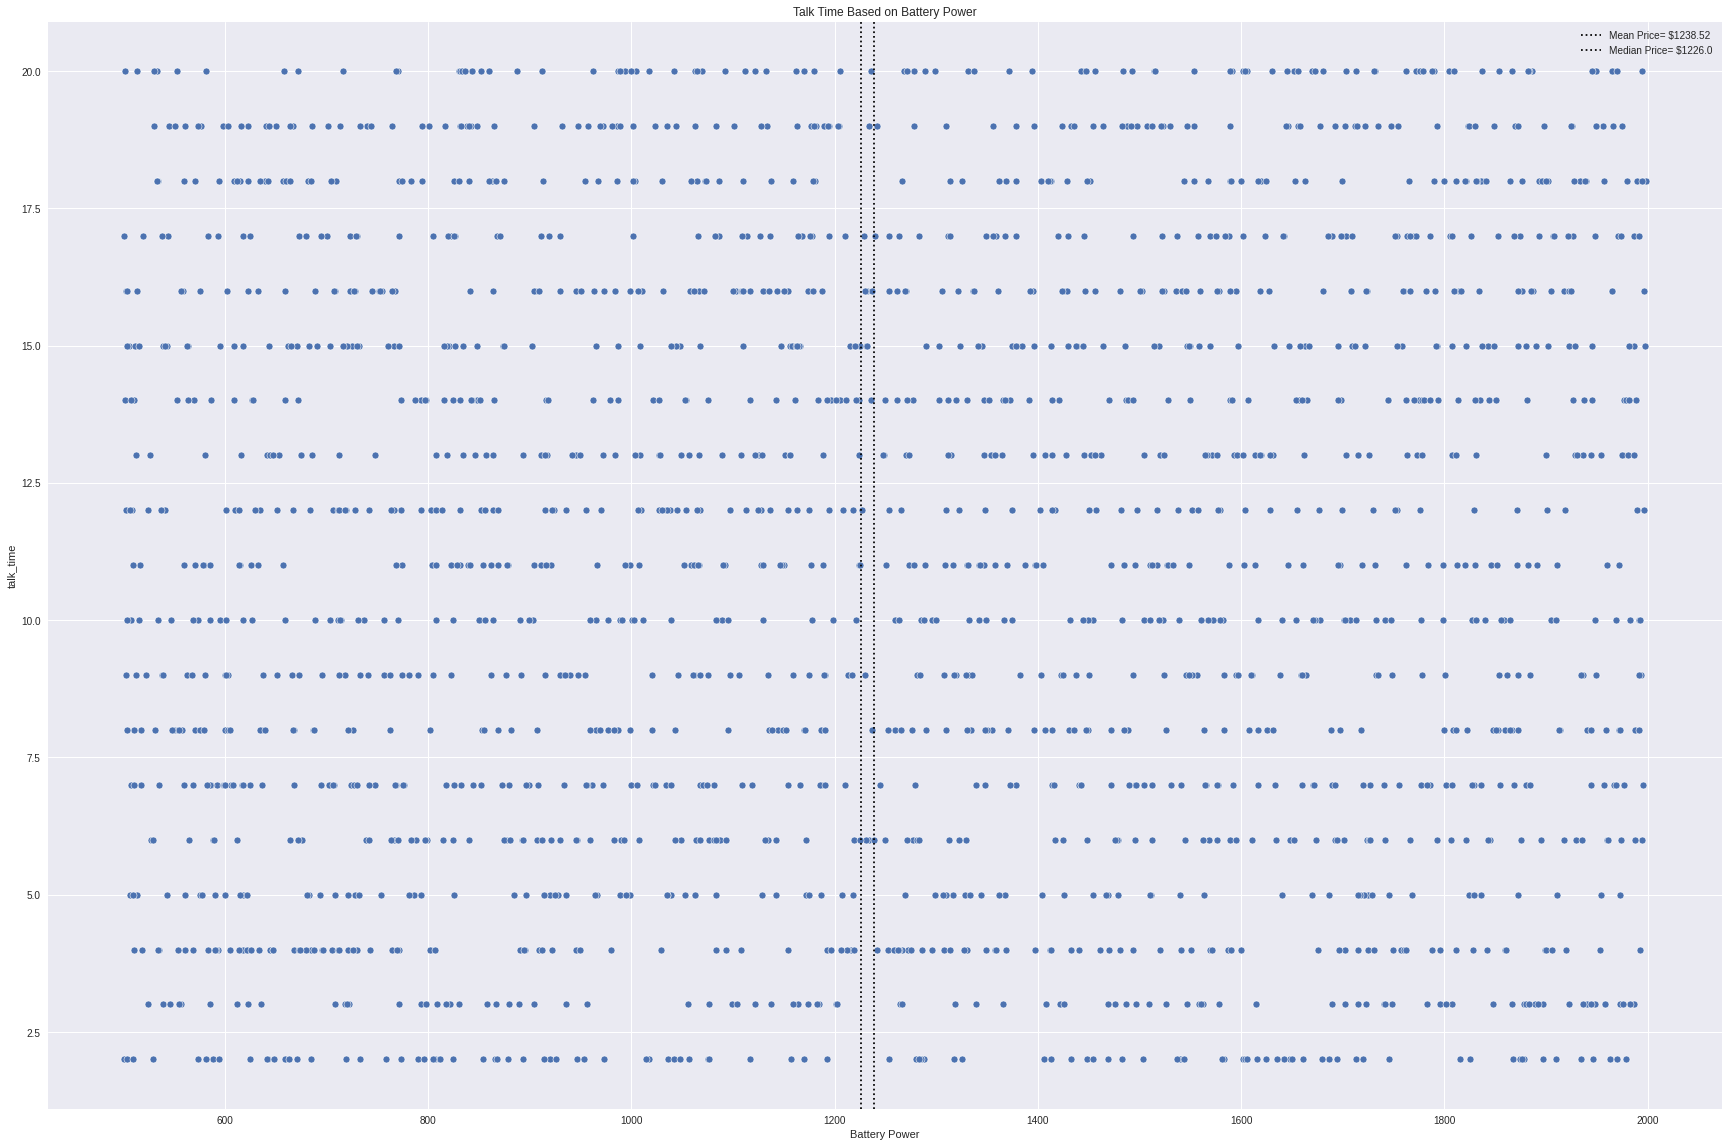

In [126]:
fig, ax = plt.subplots(figsize=(30,20))

ax = sns.scatterplot(data=mobile_df, x = 'battery_power', y = 'talk_time', palette = 'plasma')
ax.set_title('Talk Time Based on Battery Power')
ax.set_xlabel('Battery Power')

mean_price = mobile_df['battery_power'].mean()
ax.axvline(mean_price,color='k', ls=':', 
           label=f"Mean Price= ${round(mean_price,2)}");

med_price = mobile_df['battery_power'].median()
ax.axvline(med_price,color='k', ls=':', 
           label=f"Median Price= ${round(med_price,2)}");

ax.legend()

The battery power median is $1,226 less than the mean of $1,236. And, the talk-time columns group well with battery power. Which from the plot above shows little to no big separation. 

# Preprocessing

In [127]:
#  Featured Matrix and Target Vector
y = mobile_df['price_range']
X = mobile_df.drop(columns = 'price_range')

# Split the data for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [163]:
# Instantiating scaler and imputer
median_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

# Creating my numeric pipeline for the imputer and scaler
num_pipe = make_pipeline(median_imputer, scaler)

In [164]:
# Fit & transform data 
scaled_df = scaler.fit_transform(X_train)

**PCA**

In [130]:
# Fit PCA (retaining 95% of the variance)

pca = PCA(n_components=.95)
pca.fit(scaled_df)

PCA(n_components=0.95)

In [131]:
%%time
knn= KNeighborsClassifier()
knn_pca = make_pipeline(scaler, pca, knn)
knn_pca.fit(X_train, y_train)

CPU times: user 10.3 ms, sys: 9.95 ms, total: 20.2 ms
Wall time: 15 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [132]:
%%time
knn_pca.predict(X_test)

CPU times: user 45.5 ms, sys: 33.1 ms, total: 78.6 ms
Wall time: 42.3 ms


array([2, 1, 0, 2, 1, 1, 1, 0, 3, 1, 0, 1, 1, 3, 2, 2, 2, 3, 0, 0, 0, 1,
       0, 1, 0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 3, 0, 2, 2, 3, 0,
       2, 0, 1, 2, 3, 0, 3, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 2, 0, 0,
       3, 3, 2, 3, 1, 3, 0, 2, 2, 1, 0, 2, 2, 1, 3, 0, 1, 0, 0, 3, 1, 3,
       3, 0, 3, 2, 3, 1, 2, 2, 1, 3, 0, 1, 0, 1, 1, 0, 0, 3, 2, 0, 2, 1,
       0, 1, 3, 2, 3, 2, 3, 2, 0, 2, 3, 1, 3, 1, 3, 1, 1, 2, 0, 2, 2, 0,
       1, 2, 1, 3, 1, 1, 0, 2, 3, 1, 3, 2, 1, 0, 1, 1, 2, 3, 3, 0, 2, 0,
       3, 3, 0, 2, 1, 0, 1, 2, 3, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1, 1, 2, 0,
       3, 1, 1, 1, 0, 0, 2, 0, 3, 3, 2, 2, 0, 0, 0, 1, 1, 2, 3, 0, 3, 0,
       1, 0, 2, 1, 1, 3, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 1,
       2, 1, 2, 0, 0, 2, 2, 2, 0, 1, 1, 1, 1, 3, 2, 0, 1, 3, 3, 0, 1, 2,
       1, 3, 0, 2, 1, 1, 3, 1, 1, 3, 0, 3, 3, 2, 3, 2, 1, 2, 3, 1, 3, 1,
       2, 0, 2, 0, 1, 3, 2, 1, 1, 2, 0, 1, 1, 2, 3, 1, 2, 1, 0, 3, 2, 3,
       1, 0, 3, 0, 0, 1, 2, 2, 0, 1, 1, 0, 0, 3, 2,

**Without PCA**

In [133]:
%%time
knn = KNeighborsClassifier()

#Knn pipeline 
knn_pipe = make_pipeline(scaler, knn)

#Fit 
knn_fit = knn.fit(X_train, y_train)

CPU times: user 4.53 ms, sys: 1.03 ms, total: 5.56 ms
Wall time: 3.65 ms


In [134]:
%%time
knn_predict= knn_fit.predict(X_test)

CPU times: user 43.4 ms, sys: 33.1 ms, total: 76.5 ms
Wall time: 39.9 ms


The PCA test shows that the model will perform best with the PCA. 


**Model 1: Logistic Regression**

In [135]:
# Creating Regression Model
logreg = LogisticRegression()

# Create a modeling pipeline
logreg_pipe = make_pipeline(num_pipe, logreg)
logreg_pipe.fit(X_train, y_train)


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(strategy='median')),
                                 ('standardscaler', StandardScaler())])),
                ('logisticregression', LogisticRegression())])

In [136]:
logreg.get_params ()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [137]:
# Fitting training data 
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [138]:
# Looking at the score of the Log Reg model to evaluate performance
scores = logreg.score(X_test, y_test)
scores


0.616

In [139]:
print('Training accuracy:', logreg_pipe.score(X_train, y_train))
print('Testing accuracy:', logreg_pipe.score(X_test, y_test))

Training accuracy: 0.27466666666666667
Testing accuracy: 0.292


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [140]:
# creating parameter dictionary to use in GridSearchCV object

param_grid = {
    "kneighborsclassifier__n_neighbors": range(1,10),
    "kneighborsclassifier__p": range(1,5),
    "kneighborsclassifier__weights": ['distance', 'uniform']
}

In [141]:
%%time
# putting the knn pipeline and parameter grid inside the GridSearch
knn_pipe_gs = GridSearchCV(knn_pca, param_grid)

# fitting on the training data
knn_pipe_gs.fit(X_train, y_train)

# printing the results for the best parameters. 
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__p': 2, 'kneighborsclassifier__weights': 'distance'}
Accuracy of best KNN model is: 0.55
CPU times: user 1min 54s, sys: 23.9 s, total: 2min 18s
Wall time: 1min 51s


In [142]:
# Hypertuning the L1 parameter, starting by creating list of c values and empty 
# lists for us in a loop

c_list = [0.001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

# for loop in order to iterate and find performin c value

for c in c_list:
  # Instatiating the LogReg model with varying values of c
  log_rg = LogisticRegression(C=c, max_iter=1000, 
                             solver='liblinear', penalty='l1')
  
  # pipeline with model and num scaler/imputer, then fitting onto training data
  log_rg_pipe = make_pipeline(num_pipe, log_rg)
  log_rg_pipe.fit(X_train, y_train)

  # appending empty scores lists 
  train_scores.append(log_rg_pipe.score(X_train, y_train))
  test_scores.append(log_rg_pipe.score(X_test, y_test))

{0.001: 0.264,
 0.01: 0.618,
 0.1: 0.834,
 1: 0.866,
 10: 0.87,
 100: 0.868,
 1000: 0.864}

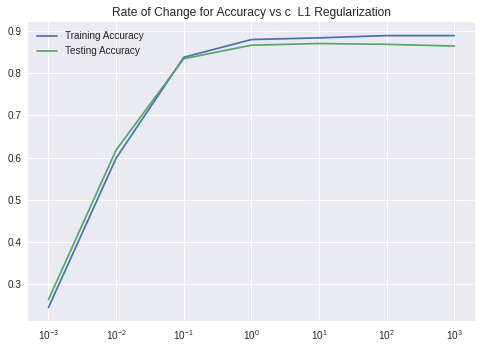

In [143]:
#plot the change in accuracy vs value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_list, train_scores, label='Training Accuracy')
ax.plot(c_list, test_scores, label='Testing Accuracy')
ax.set_xticks(c_list)
ax.set_title('Rate of Change for Accuracy vs c  L1 Regularization')
ax.legend()
 
#setting x axis to log scale 
ax.set_xscale('log')

# print a dictionary of values of C and accuracy scores
{c:round(score,3) for c, score in zip(c_list, test_scores)}

Training accuracy peaks at 0.8 while the test accuracy stays consistent. 

In [144]:
test_knn_pred

In [172]:
# using metrics function in order to see how the Logistic Regression Model fares
# in other evaluation metrics
train_pred = logreg.predict(X_train);
test_pred = logreg.predict(X_test);
train_r = classification_report(y_train, train_pred, zero_division=0);
test_r = classification_report(y_test, test_pred, zero_division=0);
print(train_r, "\n\n\n")
print(test_r)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       368
           1       0.57      0.57      0.57       382
           2       0.50      0.47      0.48       380
           3       0.68      0.75      0.71       370

    accuracy                           0.65      1500
   macro avg       0.65      0.65      0.65      1500
weighted avg       0.64      0.65      0.64      1500
 



              precision    recall  f1-score   support

           0       0.79      0.72      0.75       132
           1       0.49      0.50      0.49       118
           2       0.50      0.49      0.50       120
           3       0.67      0.73      0.70       130

    accuracy                           0.62       500
   macro avg       0.61      0.61      0.61       500
weighted avg       0.62      0.62      0.62       500



# Model 2: KNN Means

In [173]:
# Creating a KNN model with the scaler and imputer
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(num_pipe, knn)

# Fitting onto the training data
knn_pipe.fit(X_train, y_train)

# Obtaining KNN model score
k_score = knn_pipe.score(X_test, y_test)
k_score

0.518

In [174]:
# Initializing pipeline with scaler and the model
pipe_knn = make_pipeline(num_pipe, KNeighborsClassifier())

In [177]:
# creating parameter dictionary to use in GridSearchCV object
param_grid = {
    "kneighborsclassifier__n_neighbors": range(1,10),
    "kneighborsclassifier__p": range(1,5),
    "kneighborsclassifier__weights": ['distance', 'uniform']

}

In [178]:
%%time
# putting the knn pipeline and parameter grid inside the GridSearch
knn_pipe_gs = GridSearchCV(pipe_knn, param_grid)
# fitting on the training data
knn_pipe_gs.fit(X_train, y_train)

# printing the results for the best parameters. 
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 8, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'distance'}
Accuracy of best KNN model is: 0.598
CPU times: user 1min 40s, sys: 3.11 s, total: 1min 43s
Wall time: 1min 40s


In [150]:
# creating classification report for the best knn model
train_knn_pred = best_pipe.predict(X_train)
test_knn_pred = best_pipe.predict(X_test)

# printing out the classification report in order to see 
# precision, recall and f1-score for test and train sets
train_report = classification_report(y_train, train_knn_pred)
test_report = classification_report(y_test, test_knn_pred)
print(f'Classification Report for Training Set\n {train_report} \n\n')
print('Classification Report for Testing Set\n', test_report)

Classification Report for Training Set
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00       382
           2       1.00      1.00      1.00       380
           3       1.00      1.00      1.00       370

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500
 


Classification Report for Testing Set
               precision    recall  f1-score   support

           0       0.71      0.68      0.70       132
           1       0.46      0.53      0.49       118
           2       0.48      0.50      0.49       120
           3       0.76      0.67      0.71       130

    accuracy                           0.60       500
   macro avg       0.60      0.59      0.60       500
weighted avg       0.61      0.60      0.60       500



# Confusion

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


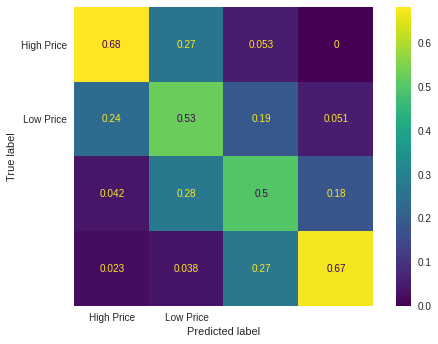

In [151]:
# Creatin labels for use on a confusion matrix 
labels = ['High Price', 'Low Price']

# Creating confusion matrix for best KNN model
plot_confusion_matrix(estimator=best_pipe, display_labels=labels, X=X_test, 
                      y_true=y_test, normalize='true');

plt.grid(False);


In [169]:
# Using the best KNN model that has already been hypertuned along withPCA
knn_w_pipe= make_pipeline(num_pipe, pca, best_pipe)

# Fitting the model on the training dataset
knn_w_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline-1',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(strategy='median')),
                                 ('standardscaler', StandardScaler())])),
                ('pca', PCA(n_components=0.95)),
                ('pipeline-2',
                 Pipeline(steps=[('pipeline',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('standardscaler',
                                                   StandardScaler())])),
                                 ('kneighborsclassifier',
                                  KNeighborsClassifier(n_neighbors=8, p=1,
                                                       weights='distance'))]))])

In [170]:
# Checking out the KNN without PCA score
knn_w_score = knn_w_pipe.score(X_test, y_test)
knn_w_score

0.536

In [171]:
# creating classification report for KNN without PCA
train_knn_w_pred = knn_w_pipe.predict(X_train)
test_knn_w_pred = knn_w_pipe.predict(X_test)

# printing out the classification report in order to see 
# precision, recall and f1-score for test and train sets
train_report = classification_report(y_train, train_knn_w_pred)
test_report = classification_report(y_test, test_knn_w_pred)
print(f'Classification Report for Training Set\n {train_report} \n\n')
print('Classification Report for Testing Set\n', test_report)

Classification Report for Training Set
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00       382
           2       1.00      1.00      1.00       380
           3       1.00      1.00      1.00       370

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500
 


Classification Report for Testing Set
               precision    recall  f1-score   support

           0       0.72      0.66      0.69       132
           1       0.41      0.47      0.44       118
           2       0.38      0.42      0.40       120
           3       0.70      0.57      0.63       130

    accuracy                           0.54       500
   macro avg       0.55      0.53      0.54       500
weighted avg       0.56      0.54      0.54       500



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


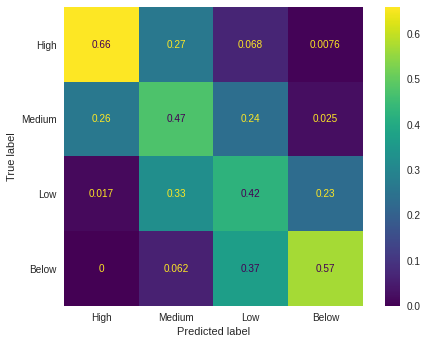

In [155]:
# Creatin labels for use on a confusion matrix 
labels = ['High', 'Medium', 'Low', 'Below']

# Creating confusion matrix for KNN with PCA model
plot_confusion_matrix(estimator=knn_w_pipe, display_labels=labels, X=X_test, 
                      y_true=y_test, normalize='true');
plt.grid(False);

# Model 3: Decision Tree Classifier

In [156]:
# Creating a copy of the df in order to conduct more Feature Engineering
df2 = mobile_df.copy()
y2 = df2['price_range']
X2 = df2.drop(columns='price_range')

# splitting df2 copy into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

In [157]:
# Creating decision tree model with initial conditions of 2 max depth for nodes
dec_tree = DecisionTreeClassifier(max_depth=2)

# Making a pipeline for the model and including the scaler and imputer
dt_pipe = make_pipeline(num_pipe, dec_tree)

# Fitting onto the training set
dt_pipe.fit(X_train, y_train)

# Obtaining sccore for the decision tree model
dt_score = dt_pipe.score(X_test, y_test)
dt_score

0.748

In [158]:
# Getting parameters in order to hypertune the decision tree model
dt_pipe.get_params()

{'memory': None,
 'steps': [('pipeline',
   Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                   ('standardscaler', StandardScaler())])),
  ('decisiontreeclassifier', DecisionTreeClassifier(max_depth=2))],
 'verbose': False,
 'pipeline': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 'decisiontreeclassifier': DecisionTreeClassifier(max_depth=2),
 'pipeline__memory': None,
 'pipeline__steps': [('simpleimputer', SimpleImputer(strategy='median')),
  ('standardscaler', StandardScaler())],
 'pipeline__verbose': False,
 'pipeline__simpleimputer': SimpleImputer(strategy='median'),
 'pipeline__standardscaler': StandardScaler(),
 'pipeline__simpleimputer__add_indicator': False,
 'pipeline__simpleimputer__copy': True,
 'pipeline__simpleimputer__fill_value': None,
 'pipeline__simpleimputer__missing_values': nan,
 'pipeline__simpleimputer__strategy': 'median',
 'pipeline__simpleimpute

In [159]:
# creating parameter dictionary to be used with Grid Search
param_grid = {'decisiontreeclassifier__max_depth':[3,5, 10],
              'decisiontreeclassifier__min_samples_leaf':[1, 2, 3],
              'decisiontreeclassifier__min_samples_split':[50, 125, 250]}

In [160]:
%%time
# Hypertuning using Grid Search
dt_grid_search = GridSearchCV(dt_pipe, param_grid)

# Fitting on training data
dt_grid_search.fit(X_train, y_train)

# displaying best parameters in order to recreate best model
dt_grid_search.best_params_

CPU times: user 2.25 s, sys: 4.55 ms, total: 2.26 s
Wall time: 2.25 s


{'decisiontreeclassifier__max_depth': 10,
 'decisiontreeclassifier__min_samples_leaf': 2,
 'decisiontreeclassifier__min_samples_split': 50}

In [161]:
# Creating a decision tree model with the best parameters
best_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=50)

# Creating pipeline with best model along with scaler and imputer pipeline.
dt_best_pipe = make_pipeline(num_pipe, best_tree)

# Fitting onto the training set
dt_best_pipe.fit(X_train, y_train)

# get score for the decision tree model
dt_best_score = dt_pipe.score(X_test, y_test)
dt_best_score

0.748

In [162]:
# creating classification report for the best decision tree model
train_tree_pred = dt_best_pipe.predict(X_train)
test_tree_pred = dt_best_pipe.predict(X_test)

# printing out the classification report to see precision, recall and f1-score for test and train sets
train_report = classification_report(y_train, train_tree_pred)
test_report = classification_report(y_test, test_tree_pred)
print(f'Classification Report for Training Set\n {train_report} \n\n')
print('Classification Report for Testing Set\n', test_report)

Classification Report for Training Set
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       368
           1       0.83      0.82      0.82       382
           2       0.75      0.84      0.79       380
           3       0.94      0.84      0.88       370

    accuracy                           0.86      1500
   macro avg       0.86      0.86      0.86      1500
weighted avg       0.86      0.86      0.86      1500
 


Classification Report for Testing Set
               precision    recall  f1-score   support

           0       0.94      0.85      0.89       132
           1       0.70      0.79      0.74       118
           2       0.64      0.73      0.68       120
           3       0.88      0.75      0.81       130

    accuracy                           0.78       500
   macro avg       0.79      0.78      0.78       500
weighted avg       0.80      0.78      0.79       500



The best model would be the decision tree classifier which has an accuracy score of 0.86 for the training set and 0.78 testing set. 